### Generate one sample path of $S(t)$ and computes the time to failure (TTF)

TTF was: 5.0


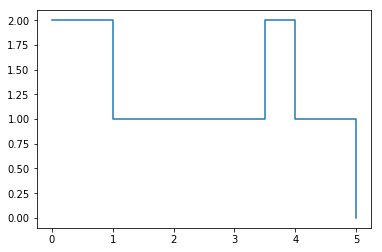

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# start with 2 functioning components at time 0
clock = 0
S = 2

# fix random number seed
#np.random.seed(1)

# initialize the time of events
NextRepair = float('inf')
NextFailure = np.ceil(6*np.random.random())
# lists to keep the event times and the states
EventTimes = [0]
States = [2]

while S > 0:
    # advance the time
    clock = min(NextRepair, NextFailure)
    
    if NextRepair < NextFailure:
        # next event is completion of a repair
        S = S + 1
        NextRepair = float('inf')
    else:
        # next event is a failure
        S = S - 1
        if S == 1:
            NextRepair = clock + 2.5
            NextFailure = clock + np.ceil(6*np.random.random())
    
    # save the time and state
    EventTimes.append(clock)
    States.append(S)

# plot the sample path
print ('TTF was:', clock)
plt.plot(EventTimes, States, drawstyle = 'steps-post')
plt.show()

### Run multiple replications and estimate the expected value of time to failure and average # of fucntioning components till failure.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Set number of replications
N = 100
# Define lists to keep samples of the outputs across replications
TTF_list = []
Ave_list = []

# fix random number seed
np.random.seed(1)

for rep in range (0,N):
    # start with 2 functioning components at time 0
    clock = 0
    S = 2
    # initialize the time of events
    NextRepair = float('inf')
    NextFailure = np.ceil(6*np.random.random())
    EventTimes = [0]
    States = [2]
    # Define variables to keep the area under the sample path
    # and the time and state of the last event
    Area = 0.0
    Tlast = 0
    Slast = 2

    while S > 0:
        # advance the time
        clock = min(NextRepair, NextFailure)

        if NextRepair < NextFailure:
            # next event is completion of a repair
            S = S + 1
            NextRepair = float('inf')
        else:
            # next event is a failure
            S = S - 1
            if S == 1:
                NextRepair = clock + 2.5
                NextFailure = clock + np.ceil(6*np.random.random())
        # Update the area under the sample path and the
        # time and state of the last event
        Area = Area + (clock - Tlast)* Slast
        Tlast = clock
        Slast = S

    # save the TTF and average # of func. components
    TTF_list.append(clock)
    Ave_list.append(Area/clock)

print('Estimated expected TTF:', np.mean(TTF_list))
print('Estimated expected ave. # of func. comp. till failure:', np.mean(Ave_list))

Estimated expected TTF: 14.63
Estimated expected ave. # of func. comp. till failure: 1.5628147211463042


### Functional version

In [11]:
import numpy as np

def Failure ():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair

    S = S - 1
    if S == 1:
        NextRepair = clock + 2.5
        NextFailure = clock + np.ceil(6*np.random.random())
    # Update the area under the sample path and the
    # time and state at the last event
    Area = Area + (clock - Tlast)* Slast
    Tlast = clock
    Slast = S

def Repair():
    global S
    global Slast
    global Tlast
    global Area
    global NextFailure
    global NextRepair

    S = S + 1
    NextRepair = float('inf')
    Area = Area + Slast * (clock - Tlast)
    Slast = S
    Tlast = clock

def Timer():
    global clock
    global NextRepair
    global NextFailure

    if NextFailure < NextRepair:
        result = "Failure"
        clock = NextFailure

    else:
        result = "Repair"
        clock = NextRepair
    return result 


# Set number of replications
N = 100
# Define lists to keep samples of the outputs across replications
TTF_list = []
Ave_list = []
# fix random number seed
np.random.seed(1)

# Replication loop
for reps in range(0,N):
    # start with 2 functioning components at time 0
    clock = 0
    S = 2
    # initialize the time of events
    NextRepair = float('inf')
    NextFailure = np.ceil(6*np.random.random())
    # Define variables to keep the area under the sample path
    # and the time and state of the last event
    Area = 0.0
    Tlast = 0
    Slast = 2

    while S > 0: # While system is functional
        NextEvent = Timer()

        if NextEvent == "Repair":
            Repair()
        else:
            Failure()

    # add samples to the lists
    TTF_list.append(clock)
    Ave_list.append(Area/clock)

# print sample averages
print('Estimated expected TTF:', np.mean(TTF_list))
print('Estimated expected ave. # of func. comp. till failure:', np.mean(Ave_list))

Estimated expected TTF: 14.63
Estimated expected ave. # of func. comp. till failure: 1.5628147211463042
